In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings("ignore")

In [8]:
indiana_pr = pd.read_csv(r'C:\Users\muham\CV Project\archive\indiana_projections.csv')
indiana_rp = pd.read_csv(r'C:\Users\muham\CV Project\archive\indiana_reports.csv')

In [9]:
indiana_pr.head(10)

uid                   filename projection
0    1     1_IM-0001-4001.dcm.png    Frontal
1    1     1_IM-0001-3001.dcm.png    Lateral
2    2     2_IM-0652-1001.dcm.png    Frontal
3    2     2_IM-0652-2001.dcm.png    Lateral
4    3     3_IM-1384-1001.dcm.png    Frontal
5    3     3_IM-1384-2001.dcm.png    Lateral
6    4     4_IM-2050-1001.dcm.png    Frontal
7    4     4_IM-2050-2001.dcm.png    Lateral
8    5  5_IM-2117-1003002.dcm.png    Frontal
9    5  5_IM-2117-1004003.dcm.png    Lateral

In [10]:
indiana_rp.head(10)

uid                                               MeSH  \
0    1                                             normal   
1    2  Cardiomegaly/borderline;Pulmonary Artery/enlarged   
2    3                                             normal   
3    4  Pulmonary Disease, Chronic Obstructive;Bullous...   
4    5  Osteophyte/thoracic vertebrae/multiple/small;T...   
5    6                                             normal   
6    7  Pulmonary Atelectasis/base;Spondylosis/thoraci...   
7    8                                             normal   
8    9  Calcified Granuloma/lung/upper lobe/right;Dens...   
9   10          Calcified Granuloma/lung/upper lobe/right   

                                            Problems  \
0                                             normal   
1                      Cardiomegaly;Pulmonary Artery   
2                                             normal   
3  Pulmonary Disease, Chronic Obstructive;Bullous...   
4                         Osteophyte;Thickening;Lung   
5                                             normal   
6        Pulmonary Atelectasis;Spondylosis;Arthritis   
7                                             normal   
8                        Calcified Granuloma;Density   
9                                Calcified Granuloma   

                                               image  \
0                          Xray Chest PA and Lateral   
1                Chest, 2 views, frontal and lateral   
2                          Xray Chest PA and Lateral   
3  PA and lateral views of the chest XXXX, XXXX a...   
4                          Xray Chest PA and Lateral   
5          PA and Lateral Chest. XXXX, XXXX at XXXX    
6                          Xray Chest PA and Lateral   
7                          Xray Chest PA and Lateral   
8                          Xray Chest PA and Lateral   
9                 PA and lateral chest x-XXXX XXXX.    

                                          indication  \
0                                   Positive TB test   
1                           Preop bariatric surgery.   
2  rib pain after a XXXX, XXXX XXXX steps this XX...   
3                      XXXX-year-old XXXX with XXXX.   
4                        Chest and nasal congestion.   
5                             Evaluate for infection   
6                               Preop lumbar surgery   
7  XXXX-year-old with XXXX on XXXX. Dyspnea. Hist...   
8  Chest pain today. History of stent placement 7...   
9                    XXXX-year-old male, chest pain.   

                                          comparison  \
0                                              None.   
1                                              None.   
2                                                NaN   
3                                     None available   
4                                                NaN   
5                                         XXXX, XXXX   
6                                         XXXX, XXXX   
7                 Two views of the chest dated XXXX.   
8  CT XXXX image XXXX, CT abdomen which included ...   
9                            Chest radiographs XXXX.   

                                            findings  \
0  The cardiac silhouette and mediastinum size ar...   
1  Borderline cardiomegaly. Midline sternotomy XX...   
2                                                NaN   
3  There are diffuse bilateral interstitial and a...   
4  The cardiomediastinal silhouette and pulmonary...   
5  Heart size and mediastinal contour are within ...   
6  The cardiac contours are normal. XXXX basilar ...   
7  The heart, pulmonary XXXX and mediastinum are ...   
8  The XXXX examination consists of frontal and l...   
9  The cardiomediastinal silhouette is within nor...   

                                          impression  
0                               Normal chest x-XXXX.  
1                       No acute pulmonary findings.  
2  No displaced rib fractures, pneumothorax, or p...  
3  1. Bullous emphysema an

In [11]:
print('Indiana projection: ',indiana_pr.shape)
print('Indiana reports: ',indiana_rp.shape)

Indiana projection:  (7466, 3)
Indiana reports:  (3851, 8)


In [12]:
indiana_rp[indiana_rp['Problems']=='pneumothorax'].nunique()

uid           0
MeSH          0
Problems      0
image         0
indication    0
comparison    0
findings      0
impression    0
dtype: int64

In [13]:
indiana_pr.isna().sum()

uid           0
filename      0
projection    0
dtype: int64

In [14]:
indiana_rp.isna().sum()

uid              0
MeSH             0
Problems         0
image            0
indication      86
comparison    1166
findings       514
impression      31
dtype: int64

In [15]:
indiana_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7466 entries, 0 to 7465
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         7466 non-null   int64 
 1   filename    7466 non-null   object
 2   projection  7466 non-null   object
dtypes: int64(1), object(2)
memory usage: 175.1+ KB


In [16]:
indiana_rp.nunique()

uid           3851
MeSH          1900
Problems      1432
image          697
indication    2454
comparison     393
findings      2553
impression    1770
dtype: int64

In [17]:
indiana_pr.nunique()

uid           3851
filename      7466
projection       2
dtype: int64

In [18]:
indiana_pr['projection'].value_counts()

projection
Frontal    3818
Lateral    3648
Name: count, dtype: int64

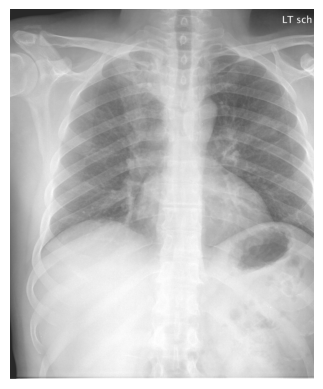

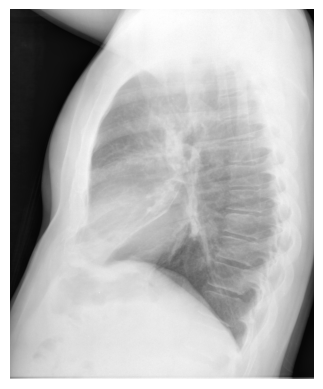

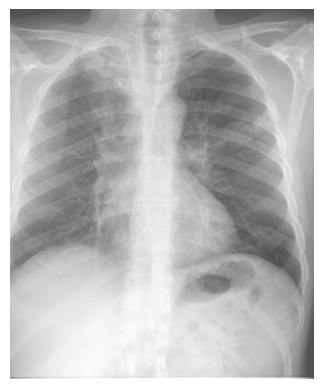

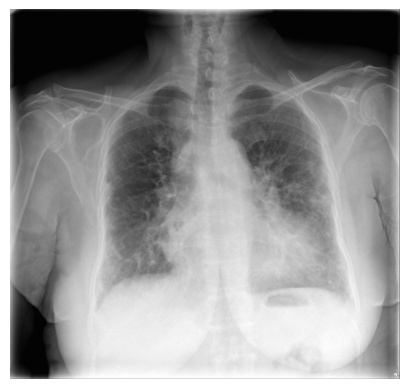

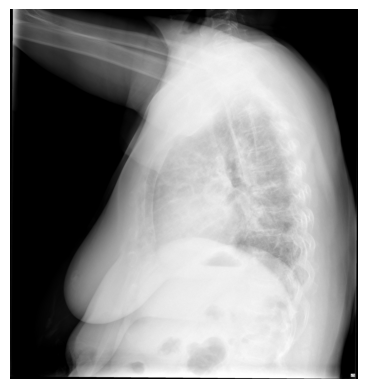

In [22]:
# Define the directory containing your images
image_directory = r'C:\Users\muham\CV Project\archive\images\images_normalized'

# List all files in the directory
image_files = [f for f in os.listdir(image_directory) if f.endswith(('.png','jpg','jpeg'))]

# Display images
for image_file in image_files[:5]:
    image_path = os.path.join(image_directory, image_file)
    image = Image.open(image_path).convert('RGB')
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [203]:
# Create captions from findings and impression fields
def create_caption(row):
    findings = row['findings'] if pd.notna(row['findings']) else ''
    impression = row['impression'] if pd.notna(row['impression']) else ''
    caption = findings + ' ' + impression  # Combine findings and impression
    return caption.strip()

# Add captions to reports
indiana_rp['caption'] = indiana_rp.apply(create_caption, axis=1)

# Merge images with captions using 'uid'
data_df = pd.merge(indiana_pr, indiana_rp[['uid', 'caption']], on='uid')

# Filter rows with empty captions
data_df = data_df[data_df['caption'].str.strip() != '']


In [204]:
data_df.head(10)

uid                   filename projection  \
0    1     1_IM-0001-4001.dcm.png    Frontal   
1    1     1_IM-0001-3001.dcm.png    Lateral   
2    2     2_IM-0652-1001.dcm.png    Frontal   
3    2     2_IM-0652-2001.dcm.png    Lateral   
4    3     3_IM-1384-1001.dcm.png    Frontal   
5    3     3_IM-1384-2001.dcm.png    Lateral   
6    4     4_IM-2050-1001.dcm.png    Frontal   
7    4     4_IM-2050-2001.dcm.png    Lateral   
8    5  5_IM-2117-1003002.dcm.png    Frontal   
9    5  5_IM-2117-1004003.dcm.png    Lateral   

                                             caption  
0  The cardiac silhouette and mediastinum size ar...  
1  The cardiac silhouette and mediastinum size ar...  
2  Borderline cardiomegaly. Midline sternotomy XX...  
3  Borderline cardiomegaly. Midline sternotomy XX...  
4  No displaced rib fractures, pneumothorax, or p...  
5  No displaced rib fractures, pneumothorax, or p...  
6  There are diffuse bilateral interstitial and a...  
7  There are diffuse bilateral interstitial and a...  
8  The cardiomediastinal silhouette and pulmonary...  
9  The cardiomediastinal silhouette and pulmonary...

In [205]:
# Set the file location
loc = r"C:\Users\muham\CV Project\archive\images\images_normalized"  # Use raw string for Windows path

# Remove any leading slashes from filenames in the DataFrame to avoid extra slashes
data_df['filename'] = loc + '\\'+ data_df['filename']  # Strip leading backslashes

# Display the updated DataFrame
data_df.head()

uid                                           filename projection  \
0    1  C:\Users\muham\CV Project\archive\images\image...    Frontal   
1    1  C:\Users\muham\CV Project\archive\images\image...    Lateral   
2    2  C:\Users\muham\CV Project\archive\images\image...    Frontal   
3    2  C:\Users\muham\CV Project\archive\images\image...    Lateral   
4    3  C:\Users\muham\CV Project\archive\images\image...    Frontal   

                                             caption  
0  The cardiac silhouette and mediastinum size ar...  
1  The cardiac silhouette and mediastinum size ar...  
2  Borderline cardiomegaly. Midline sternotomy XX...  
3  Borderline cardiomegaly. Midline sternotomy XX...  
4  No displaced rib fractures, pneumothorax, or p...

In [206]:
data_df['filename'][0]

'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\1_IM-0001-4001.dcm.png'

In [207]:
data_df.isna().sum()

uid           0
filename      0
projection    0
caption       0
dtype: int64

In [208]:
data_df.nunique()

uid           3826
filename      7426
projection       2
caption       3066
dtype: int64

In [209]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

# Load pretrained ResNet34 model
model = models.resnet34(pretrained=True)
model.eval()  # Set model to evaluation mode

# Grad-CAM function (defined below)

# Preprocessing pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [210]:
def get_grad_cam(model, img_tensor, target_layer='layer4'):
    """
    Generate Grad-CAM heatmap for a given image and model.
    Args:
        model: Pretrained ResNet34 model.
        img_tensor: Preprocessed image tensor.
        target_layer: The layer in ResNet34 to hook for Grad-CAM (default is 'layer4').
    Returns:
        heatmap: Grad-CAM heatmap as a NumPy array.
    """
    gradients = None
    activations = None

    # Hook to capture gradients
    def backward_hook(module, grad_in, grad_out):
        nonlocal gradients
        gradients = grad_out[0]

    # Hook to capture activations
    def forward_hook(module, input, output):
        nonlocal activations
        activations = output

    # Register hooks to the target layer
    target_module = dict(model.named_modules())[target_layer]
    target_module.register_forward_hook(forward_hook)
    target_module.register_backward_hook(backward_hook)

    # Forward pass
    output = model(img_tensor)
    target_class = output.argmax(dim=1).item()

    # Backward pass
    model.zero_grad()
    output[0, target_class].backward()

    # Compute Grad-CAM
    gradients = gradients.detach().cpu().numpy()
    activations = activations.detach().cpu().numpy()
    weights = np.mean(gradients, axis=(2, 3))  # Global average pooling over gradients

    cam = np.sum(weights[:, :, np.newaxis, np.newaxis] * activations, axis=1)
    cam = np.maximum(cam, 0)  # ReLU to retain only positive contributions
    cam = cam[0]  # Remove batch dimension
    cam = cam - np.min(cam)  # Normalize
    cam = cam / np.max(cam)

    return cam

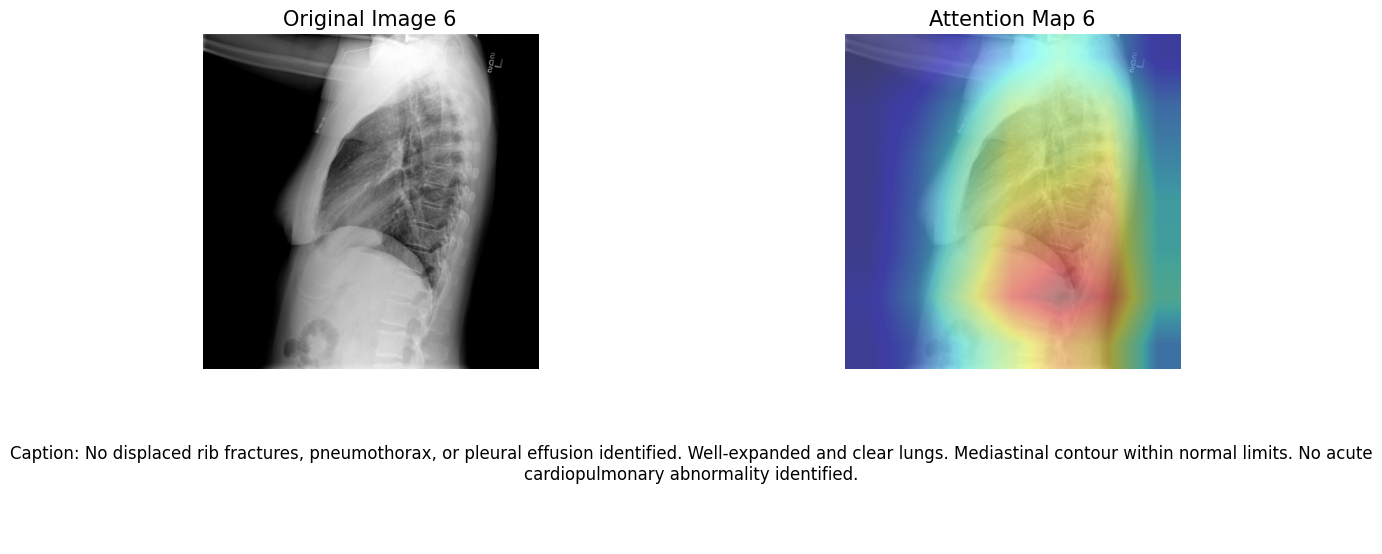

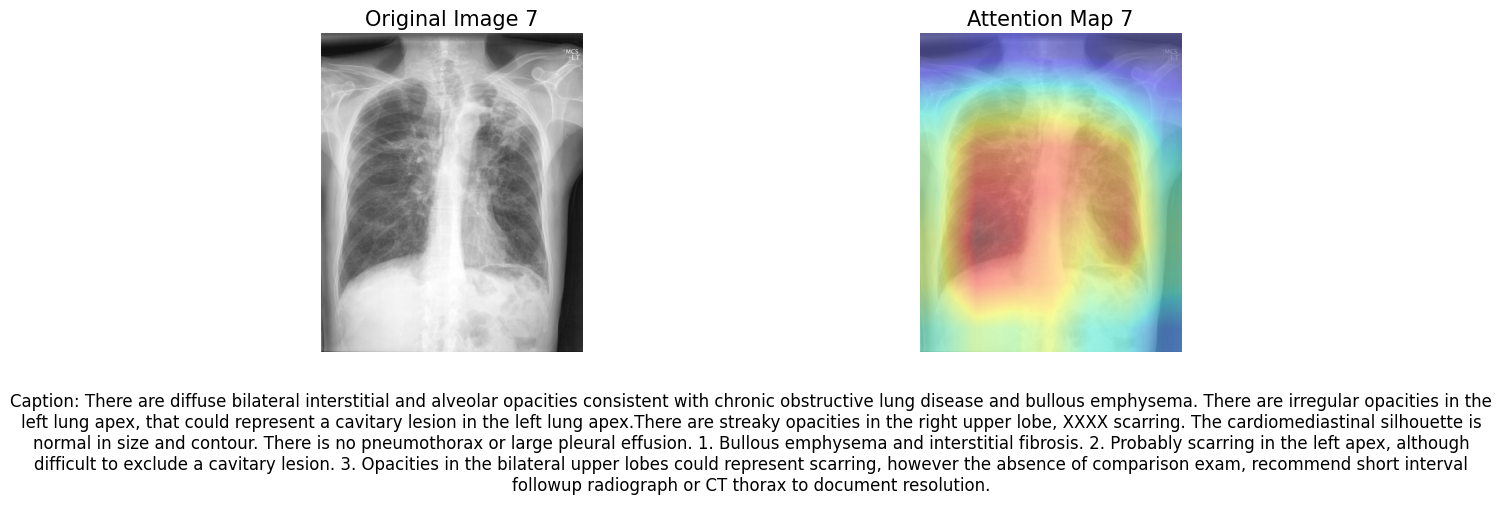

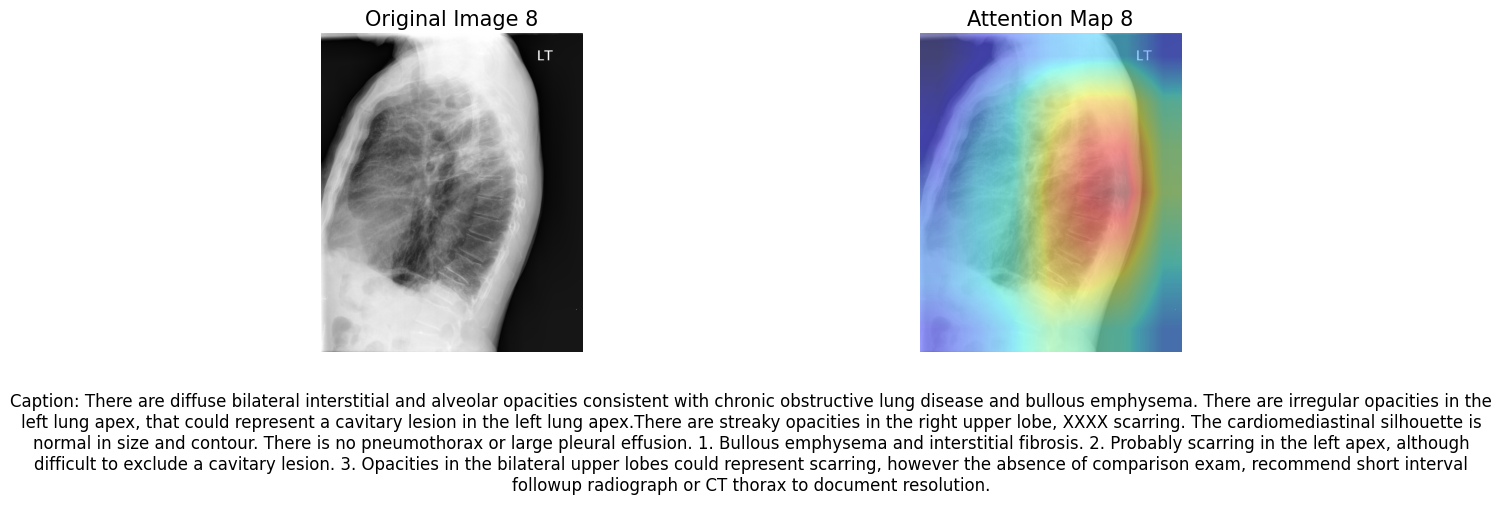

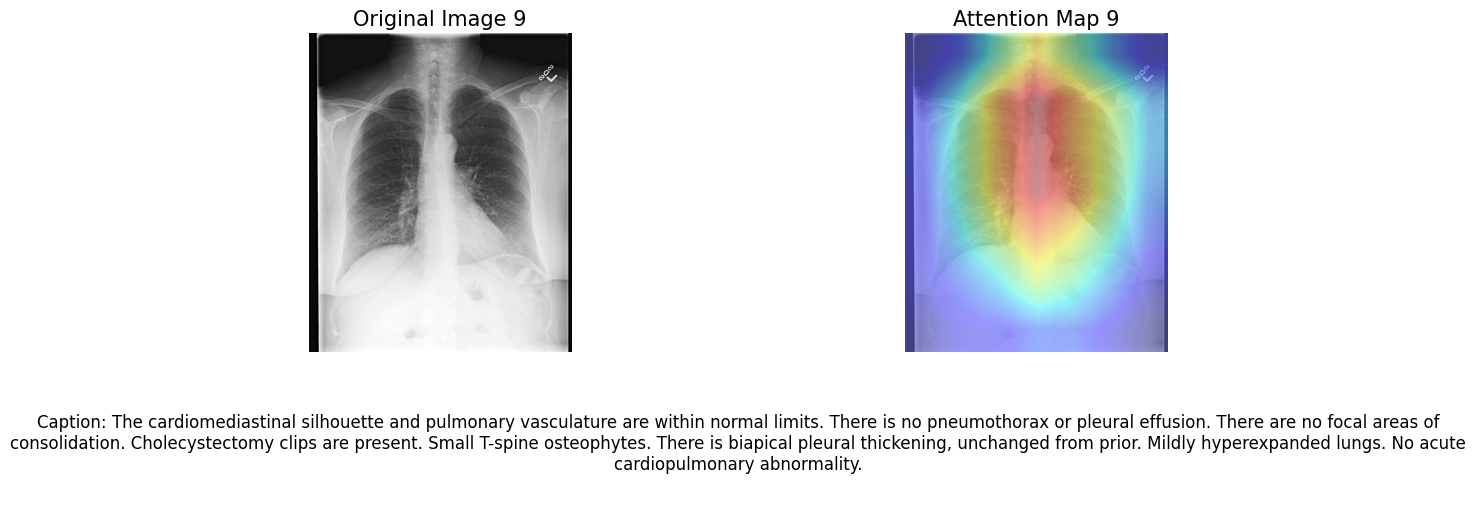

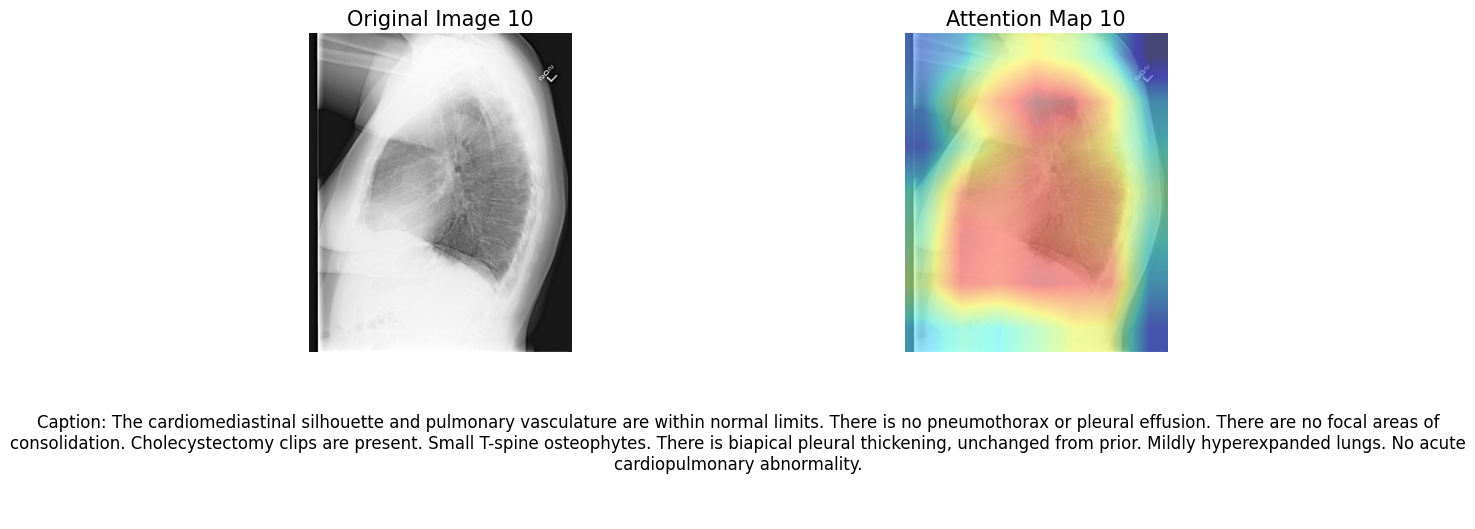

In [211]:
# Assuming `data_df` is already prepared with 'filename' and 'caption'
# Fetch images and captions for indices 5 to 10 (6th to 10th images)
image_captions = data_df[['filename', 'caption']].iloc[5:10]

# Loop through the selected images
for idx, (index, row) in enumerate(image_captions.iterrows()):
    img_path = row['filename']
    caption = row['caption']
    
    #img_path = os.path.join("C:/Users/muham/CV Project/archive/images", row['filename'])

    # Load and preprocess the image
    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

    # Generate Grad-CAM heatmap
    heatmap = get_grad_cam(model, img_tensor, target_layer='layer4')

    # Resize heatmap to match original image size
    heatmap_resized = np.uint8(255 * heatmap)
    heatmap_resized = Image.fromarray(heatmap_resized).resize(img.size, Image.BILINEAR)

    # Create a figure with a grid layout for images and captions
    fig = plt.figure(figsize=(15, 12))  # Adjust size for better visibility

    # Original Image
    ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2, colspan=1)  # Top-left grid
    ax1.imshow(img)
    ax1.set_title(f"Original Image {index + 1}", fontsize=15)
    ax1.axis('off')

    # Attention Map
    ax2 = plt.subplot2grid((3, 2), (0, 1), rowspan=2, colspan=1)  # Top-right grid
    ax2.imshow(img, alpha=0.6)  # Overlay original image
    ax2.imshow(heatmap_resized, cmap='jet', alpha=0.4)  # Overlay heatmap
    ax2.set_title(f"Attention Map {index + 1}", fontsize=15)
    ax2.axis('off')

    # Caption Section (Below the images, spanning both columns)
    ax_caption = plt.subplot2grid((3, 2), (2, 0), colspan=2)
    ax_caption.axis('off')  # Hide axes for the caption area
    ax_caption.text(0.5, 0.5, f"Caption: {caption}", fontsize=12, ha='center', va='center', wrap=True)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.05, 1, 0.5])  # Leave space for the caption
    plt.show()

## Feature Extraction

In [212]:
# import os
# import torch
# import torchvision.transforms as transforms
# from torchvision.models import resnet101
# from PIL import Image
# import matplotlib.pyplot as plt

# # Load ResNet-101 model
# model = resnet101(pretrained=True)
# model.eval()

# # Extract intermediate layer (Example: Layer 4's output in ResNet-101)
# intermediate_model = torch.nn.Sequential(*list(model.children())[:-2])  # Extract layers before pooling

# # Preprocessing pipeline
# preprocess = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to 224x224
#     transforms.ToTensor(),         # Convert to tensor
#     transforms.Normalize(          # Normalize with ImageNet stats
#         mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
#     )
# ])

# # Directory of images
# #image_directory = "/path/to/your/image/folder"

# # Flag to control visualization (set True to visualize only for the first image)
# visualized = False

# # List to store extracted features for all images
# extracted_features = []

# # Process each image in the directory
# for img_file in os.listdir(image_directory):
#     img_path = os.path.join(image_directory, img_file)

#     if img_file.endswith(('.jpg', '.png', '.jpeg')):
#         # Load and preprocess the image
#         image = Image.open(img_path).convert('RGB')
#         input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

#         # Pass through intermediate model
#         with torch.no_grad():
#             intermediate_features = intermediate_model(input_tensor)  # Shape: (1, num_channels, H, W)

#         # Squeeze batch dimension and convert to numpy
#         feature_map = intermediate_features.squeeze(0).cpu().numpy()  # Shape: (num_channels, H, W)
#         extracted_features.append(feature_map)  # Append features for this image

#         # Visualize feature maps only for the first image
#         if not visualized:
#             num_channels = feature_map.shape[0]
#             plt.figure(figsize=(20, 10))
#             for i in range(min(num_channels, 16)):  # Visualize first 16 channels
#                 plt.subplot(4, 4, i + 1)
#                 plt.imshow(feature_map[i], cmap="gray")
#                 plt.axis("off")
#             plt.suptitle(f"Feature Maps for {img_file}")
#             plt.show()
#             visualized = True  # Set the flag to True to avoid further visualizations

# # Print summary of features extracted
# print(f"Extracted features for {len(extracted_features)} images.")


this is feature extracted for each image
2048 determines the number of feature maps for an image and 7,7 represents the number ofthe spatial features

In [ ]:
#extracted_features[0].shape

(2048, 7, 7)

In [ ]:
#print(extracted_features[0])

[[[0.4367987  0.94445056 1.2054677  ... 1.2545246  1.6307694  2.2864187 ]
  [0.8691333  1.5807264  3.0211482  ... 1.6701856  2.103131   1.3203183 ]
  [1.205498   3.2989569  3.8633816  ... 2.2832632  2.1957035  2.1589756 ]
  ...
  [0.         0.23021968 1.3677927  ... 1.5854443  0.67638636 0.11628994]
  [0.         0.         1.2948204  ... 1.2981824  0.24175486 0.        ]
  [0.         0.         0.6506236  ... 1.6062984  0.24316995 0.        ]]

 [[0.38046268 0.65199643 0.06644398 ... 0.1364469  0.35715204 0.        ]
  [0.32027477 0.63448524 0.3098302  ... 0.58878464 0.         0.        ]
  [0.06497431 0.09114853 0.3039318  ... 0.5139601  0.         0.        ]
  ...
  [1.1316569  0.37093616 0.42962015 ... 0.8490343  0.18329796 0.14215338]
  [2.188507   0.9645262  0.46320918 ... 0.77417696 0.10763189 0.7894604 ]
  [2.0015824  1.217804   0.1450166  ... 0.6232219  0.5334296  0.3273129 ]]

 [[0.         0.         0.         ... 0.5964039  0.20301811 0.        ]
  [0.         0.      

In [213]:
WORKING_DIR =os.getcwd()

In [ ]:
# # store features in pickle
# import pickle
# pickle.dump(extracted_features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [214]:
import pickle
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [215]:
# import os
# import torch
# from torchvision import transforms
# from PIL import Image

# # Directory containing X-ray images
# image_directory = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized"

# # Preprocessing pipeline for 3 channels
# preprocess = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to a uniform size
#     transforms.ToTensor(),  # Convert image to tensor
# ])

# # Iterate through all images and check their size after preprocessing
# for img_file in os.listdir(image_directory):
#     img_path = os.path.join(image_directory, img_file)

#     # Ensure it's an image file
#     if img_file.endswith(('.jpg', '.png', '.jpeg')):
#         # Open and preprocess the image
#         xray_image = Image.open(img_path).convert('RGB')  # Convert to RGB (3 channels)
#         processed_image = preprocess(xray_image)  # Apply preprocessing

#         # Print the shape of the processed image
#         print(f"Image: {img_file}, Shape after preprocessing: {processed_image.shape}")

In [216]:
# pip install torch torchvision torchaudio

In [217]:
file_path = 'captions.txt'

# Write captions to a text file
with open(file_path, 'w') as file:
    for caption in data_df['caption']:
        file.write(caption + '\n')  # Write each caption followed by a newline

print(f"Captions written to {file_path}")

Captions written to captions.txt


In [218]:
BASE_DIR = os.getcwd()

In [219]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [221]:
mapping = {}

# Iterate over the DataFrame rows
for _, row in data_df.iterrows():
    image_path = row['filename']  # Full image path
    caption = row['caption']      # Assuming there's a 'caption' column in the DataFrame
    
    # Extract image ID (e.g., remove file extension)
    image_id = image_path.split('/')[-1].split('.')[0]
    
    # Create a list for the captions if the image ID is not already in the dictionary
    if image_id not in mapping:
        mapping[image_id] = []
    
    # Add the caption to the list of captions for this image
    mapping[image_id].append(caption)

# Display a few mappings
for k, v in list(mapping.items())[:5]:
    print(f"Image ID: {k}, Captions: {v}")

Image ID: C:\Users\muham\CV Project\archive\images\images_normalized\1_IM-0001-4001, Captions: ['The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.']
Image ID: C:\Users\muham\CV Project\archive\images\images_normalized\1_IM-0001-3001, Captions: ['The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.']
Image ID: C:\Users\muham\CV Project\archive\images\images_normalized\2_IM-0652-1001, Captions: ['Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX. No acute pulmonary findings.']
Image ID: C:\Users\muham\CV Project\archive\images\images_normalized\2_IM-0652-2001, Captions

In [222]:
len(mapping)

7426

In [224]:
import re

def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # Take one caption at a time
            caption = captions[i]
            # Preprocessing steps
            # Convert to lowercase
            caption = caption.lower()
            # Remove digits, special characters, etc.
            caption = re.sub(r'[^a-z\s]', '', caption)
            # Remove additional spaces
            caption = re.sub(r'\s+', ' ', caption).strip()
            # Add start and end tags to the caption
            caption = '<start> ' + " ".join([word for word in caption.split() if len(word) > 1]) + ' <endseq>'
            # Save the cleaned caption back to the list
            captions[i] = caption

In [225]:
# before preprocess of text
mapping

{'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\1_IM-0001-4001': ['The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.'],
 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\1_IM-0001-3001': ['The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.'],
 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\2_IM-0652-1001': ['Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX. No acute pulmonary findings.'],
 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\2_IM-0652-2001': ['Borderline cardiomegaly. Midline 

In [226]:
clean(mapping)

In [227]:
mapping

{'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\1_IM-0001-4001': ['<start> the cardiac silhouette and mediastinum size are within normal limits there is no pulmonary edema there is no focal consolidation there are no xxxx of pleural effusion there is no evidence of pneumothorax normal chest xxxxx <endseq>'],
 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\1_IM-0001-3001': ['<start> the cardiac silhouette and mediastinum size are within normal limits there is no pulmonary edema there is no focal consolidation there are no xxxx of pleural effusion there is no evidence of pneumothorax normal chest xxxxx <endseq>'],
 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\2_IM-0652-1001': ['<start> borderline cardiomegaly midline sternotomy xxxx enlarged pulmonary arteries clear lungs inferior xxxx xxxx xxxx no acute pulmonary findings <endseq>'],
 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\2_IM-0652-2001': ['<start

In [228]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [229]:
len(all_captions)

7426

In [230]:
all_captions[:10]

['<start> the cardiac silhouette and mediastinum size are within normal limits there is no pulmonary edema there is no focal consolidation there are no xxxx of pleural effusion there is no evidence of pneumothorax normal chest xxxxx <endseq>',
 '<start> the cardiac silhouette and mediastinum size are within normal limits there is no pulmonary edema there is no focal consolidation there are no xxxx of pleural effusion there is no evidence of pneumothorax normal chest xxxxx <endseq>',
 '<start> borderline cardiomegaly midline sternotomy xxxx enlarged pulmonary arteries clear lungs inferior xxxx xxxx xxxx no acute pulmonary findings <endseq>',
 '<start> borderline cardiomegaly midline sternotomy xxxx enlarged pulmonary arteries clear lungs inferior xxxx xxxx xxxx no acute pulmonary findings <endseq>',
 '<start> no displaced rib fractures pneumothorax or pleural effusion identified wellexpanded and clear lungs mediastinal contour within normal limits no acute cardiopulmonary abnormality id

In [231]:
print(sum(1 for key in mapping.keys() if key is None))
print(sum(1 for value in mapping.values() if value is None))

0
0


In [232]:
print(mapping.keys())

dict_keys(['C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\1_IM-0001-4001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\1_IM-0001-3001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\2_IM-0652-1001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\2_IM-0652-2001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\3_IM-1384-1001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\3_IM-1384-2001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\4_IM-2050-1001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\4_IM-2050-2001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\5_IM-2117-1003002', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\5_IM-2117-1004003', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_normalized\\6_IM-2192-1001', 'C:\\Users\\muham\\CV Project\\archive\\images\\images_norm

In [233]:
print(mapping.values())

dict_values([['<start> the cardiac silhouette and mediastinum size are within normal limits there is no pulmonary edema there is no focal consolidation there are no xxxx of pleural effusion there is no evidence of pneumothorax normal chest xxxxx <endseq>'], ['<start> the cardiac silhouette and mediastinum size are within normal limits there is no pulmonary edema there is no focal consolidation there are no xxxx of pleural effusion there is no evidence of pneumothorax normal chest xxxxx <endseq>'], ['<start> borderline cardiomegaly midline sternotomy xxxx enlarged pulmonary arteries clear lungs inferior xxxx xxxx xxxx no acute pulmonary findings <endseq>'], ['<start> borderline cardiomegaly midline sternotomy xxxx enlarged pulmonary arteries clear lungs inferior xxxx xxxx xxxx no acute pulmonary findings <endseq>'], ['<start> no displaced rib fractures pneumothorax or pleural effusion identified wellexpanded and clear lungs mediastinal contour within normal limits no acute cardiopulmona

In [234]:
# tokenize the text
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [235]:
vocab_size

2070

In [236]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

227

In [237]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.85)
train = image_ids[:split]
test = image_ids[split:]

In [238]:
# create data generator to get data in batch (avoids session crash)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

In [239]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    output_signature = (
        (tf.TensorSpec(shape=(None, *features[data_keys[0]][0].shape), dtype=tf.float32),  # X1 feature shape
         tf.TensorSpec(shape=(None, max_length), dtype=tf.int32)),  # X2 sequence shape
        tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)   # y categorical shape
    )

    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size),
        output_signature=output_signature
    )

    return dataset

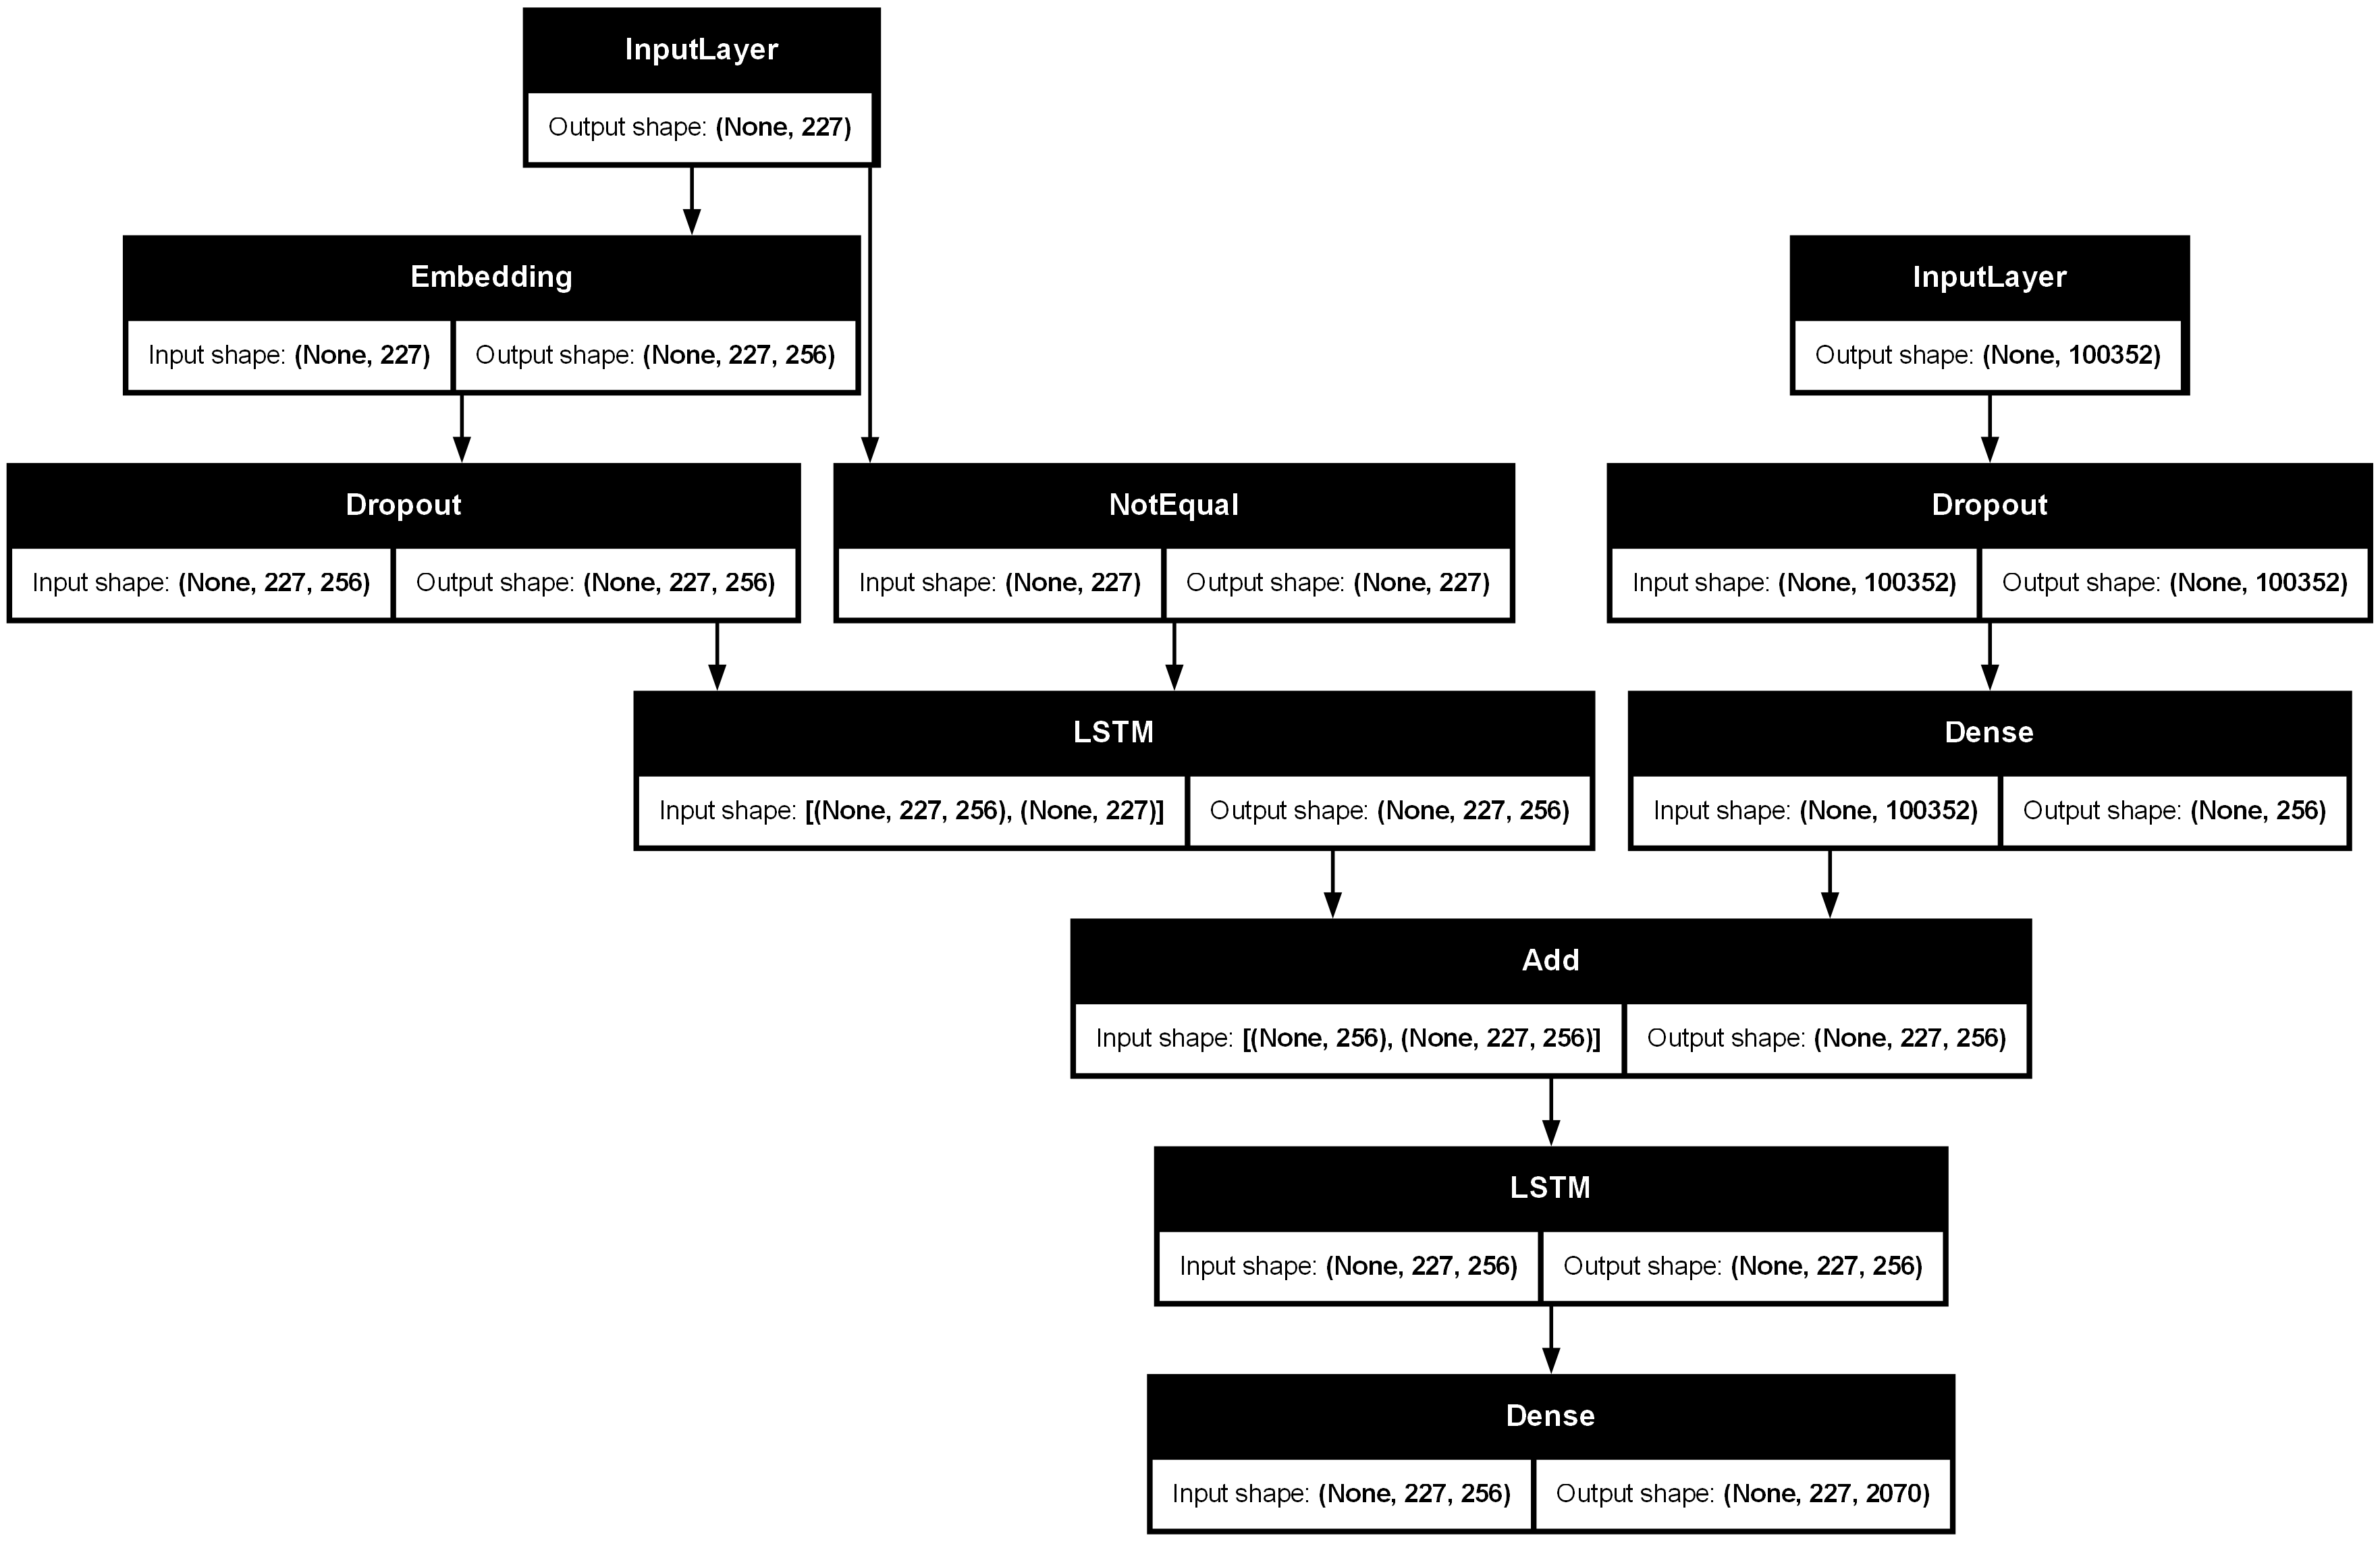

In [240]:
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Image feature layers
inputs1 = Input(shape=(100352,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# Sequence feature layers (caption input)
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256, return_sequences=True)(se2)  # return_sequences=True to output sequence

# Decoder model (combine image features and sequence features)
decoder1 = add([fe2, se3])
decoder2 = LSTM(256, return_sequences=True)(decoder1)  # Another LSTM layer with return_sequences
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# Define the model
model = Model(inputs=[inputs1, inputs2], outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Plot the model
plot_model(model, show_shapes=True)


In [241]:
# train the model
epochs = 20
batch_size = 32
steps = len(train) // batch_size

In [242]:
import tensorflow as tf

def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    for idx, key in enumerate(data_keys):
        # Extract image features from the list using index
        feature_map = features[idx]  # Use the index to access the feature
        feature_map = tf.reshape(feature_map, (-1, 2048 * 7 * 7))  # Flatten to shape (2048*7*7)
        
        # Process captions (this should already be in integer form for input)
        caption = mapping[key]  # This is a list of captions
        caption_tokens = tokenizer.texts_to_sequences(caption)
        caption_padded = tf.keras.preprocessing.sequence.pad_sequences(caption_tokens, maxlen=max_length, padding='post')

        # Prepare the labels for the next word prediction task
        labels = tf.keras.utils.to_categorical(caption_padded, num_classes=vocab_size)

        # Yield a batch
        yield (feature_map, caption_padded), labels

def create_dataset(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    dataset = tf.data.Dataset.from_generator(
        lambda: data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size),
        output_signature=(
            (tf.TensorSpec(shape=(None, 2048 * 7 * 7), dtype=tf.float32),  # Flattened feature shape
             tf.TensorSpec(shape=(None, max_length), dtype=tf.int32)),  # Caption shape
            tf.TensorSpec(shape=(None, vocab_size), dtype=tf.float32)   # Labels (one-hot encoded)
        )
    )
    return dataset


# Create dataset
dataset = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)

In [243]:
history = model.fit(dataset, epochs=epochs, steps_per_epoch=steps, verbose=1)

Epoch 1/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 32s 147ms/step - accuracy: 0.7949 - loss: 2.5196
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.8120 - loss: 1.4900
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.8165 - loss: 1.4609
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.8433 - loss: 1.2276
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.8078 - loss: 1.5302
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.8127 - loss: 1.4602
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.8386 - loss: 1.3090
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.8299 - loss: 1.3385
Epoch 9/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.8242 - loss: 1.4101
Epoch 10/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.8245 - loss: 1.4118
Epoch 11/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.8130 - loss: 1.4955
Epoch 12/20
197/197

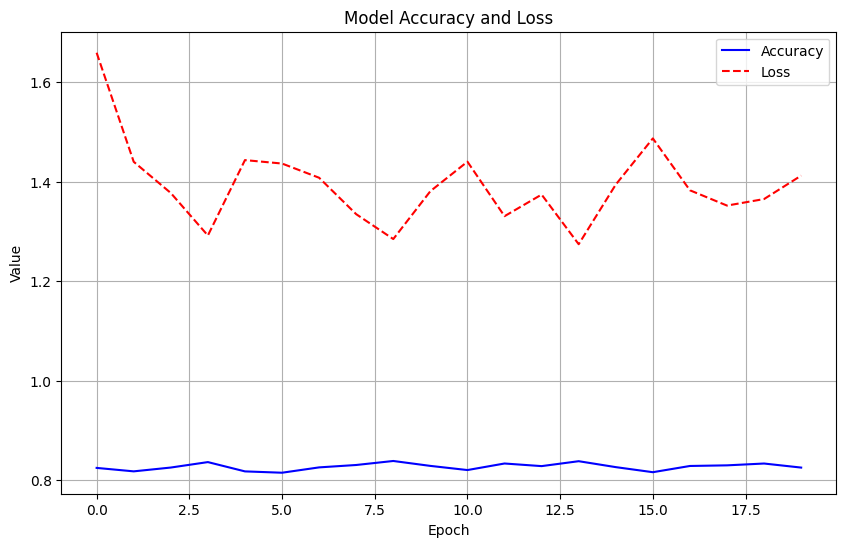

In [244]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Accuracy', color='blue', linestyle='-')

# Plot loss
plt.plot(history.history['loss'], label='Loss', color='red', linestyle='--')

# Add title and labels
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')

# Add a legend
plt.legend(loc='upper right')

# Show the graph
plt.grid(True)
plt.show()

In [245]:
# save the model
model.save(WORKING_DIR+'/best_model.h5')

In [246]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [265]:
def predict_caption(model, image_feature, tokenizer, max_length):
    # Prepare the image feature and tokenized input
    # Ensure the image feature is of the correct shape
    image_feature = tf.convert_to_tensor(image_feature)  # Ensure it's a tensor
    
    # Get the start and end tokens from the tokenizer
    start_token = tokenizer.word_index.get('<start>', None)
    end_token = tokenizer.word_index.get('<endseq>', None)
    
    if '<start>' not in tokenizer.word_index:
        tokenizer.word_index['<start>'] = len(tokenizer.word_index) + 1  # Add '<start>' token
    if '<endseq>' not in tokenizer.word_index:
        tokenizer.word_index['<endseq>'] = len(tokenizer.word_index) + 1  # Add '<endseq>' token

    if start_token is None or end_token is None:
        raise ValueError("The tokenizer must have '<start>' and '<endseq>' tokens.")
    
    # Check if the tokenizer has '<start>' and '<endseq>' tokens, and add them if missing

    # Initialize the captioning with the start token
    caption_input = [start_token]  # Start with the start token
    
    for i in range(max_length):
        # Prepare the input (image feature + current caption sequence)
        sequence_input = tf.convert_to_tensor([caption_input])  # Convert to tensor
        image_input = tf.convert_to_tensor(image_feature)  # Image features
        image_input = tf.expand_dims(image_input, axis=0)  # Add batch dimension
        
        # Get prediction from the model
        predicted_probs = model.predict([image_input, sequence_input], verbose=0)
        predicted_token = tf.argmax(predicted_probs[0, -1]).numpy()  # Get token with highest probability
        
        # Append predicted token to the caption sequence
        caption_input.append(predicted_token)
        
        # If we hit the end token, stop the caption generation
        if predicted_token == end_token:
            break
    
    # Decode the caption sequence back to words
    caption = tokenizer.sequences_to_texts([caption_input])[0]
    
    return caption


In [266]:
predict_caption(model,features,tokenizer,max_length)

ValueError: The tokenizer must have '<start>' and '<endseq>' tokens.

In [257]:
print(actual)
print(predicted)

[]
[]


In [261]:
from nltk.translate.bleu_score import corpus_bleu,SmoothingFunction
from tqdm import tqdm

# Initialize actual and predicted lists
actual, predicted = list(), list()

# Assuming `test` is a list of indices or strings
for key in tqdm(test):
    # Get actual caption(s) for the image from the `mapping` dictionary
    captions = mapping[key]  # Get the actual captions for the image
    # Debugging: Print the key to understand its format
    print(f"Key: {key}")
    
    try:
        # Extract the image filename from the path by splitting the string from the last backslash
        filename = key.split('\\')[-1]  # Extract the filename (e.g., 3415_IM-1650-1001.dcm.png)
        print(f"Filename: {filename}")  # Debugging: print filename
        
        # Now split the filename and extract the index from the first part
        index = int(filename.split('_')[-1])  # Extract the first part before the underscore (3415)
        print(f"Index for extracted_features: {index}")  # Debugging: print index
        
        # Predict the caption for the image
        y_pred = predict_caption(history, features[index], tokenizer, max_length)
        
        # Split actual captions into words (list of list of words)
        actual_captions = [caption.split() for caption in captions]
        
        # Split predicted caption into words
        y_pred = y_pred.split()
        
        # Append to the list
        actual.append(actual_captions)
        predicted.append(y_pred)
    
    except IndexError:
        # Handle cases where the key doesn't match the expected format
        print(f"IndexError for key: {key}. Skipping this item.")
    except ValueError:
        # Handle cases where the filename format is not as expected
        print(f"ValueError for key: {key}. Skipping this item.")
    except KeyError as e:
        # Handle the KeyError for missing special tokens
        print(f"KeyError for missing token: {e}. Skipping this item.")
        
def safe_bleu(actual, predicted):
    try:
        return corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=SmoothingFunction().method1)
    except ZeroDivisionError:
        return 0.0  # Return zero if a division by zero occurs
    
print("BLEU-1:", safe_bleu(actual, predicted))
# Calculate BLEU score
# print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0), smoothing_function=smoothing_function))
# print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing_function))


100%|██████████| 1114/1114 [00:00<00:00, 146655.83it/s]

Key: C:\Users\muham\CV Project\archive\images\images_normalized\3415_IM-1650-1001
Filename: 3415_IM-1650-1001
ValueError for key: C:\Users\muham\CV Project\archive\images\images_normalized\3415_IM-1650-1001. Skipping this item.
Key: C:\Users\muham\CV Project\archive\images\images_normalized\3415_IM-1650-1002
Filename: 3415_IM-1650-1002
ValueError for key: C:\Users\muham\CV Project\archive\images\images_normalized\3415_IM-1650-1002. Skipping this item.
Key: C:\Users\muham\CV Project\archive\images\images_normalized\3416_IM-1651-0001-0001
Filename: 3416_IM-1651-0001-0001
ValueError for key: C:\Users\muham\CV Project\archive\images\images_normalized\3416_IM-1651-0001-0001. Skipping this item.
Key: C:\Users\muham\CV Project\archive\images\images_normalized\3416_IM-1651-0001-0002
Filename: 3416_IM-1651-0001-0002
ValueError for key: C:\Users\muham\CV Project\archive\images\images_normalized\3416_IM-1651-0001-0002. Skipping this item.
Key: C:\Users\muham\CV Project\archive\images\images_norma

In [ ]:
def predict_caption_m2_transformer(model, image_features, tokenizer, max_length):
    """
    Predict caption for given image features using M2 Transformer.
    """
    # Initialize input sequence with the start token
    input_seq = [tokenizer.word_index['<startseq>']]
    caption = []
    
    for _ in range(max_length):
        # Prepare input for the transformer
        input_seq_tensor = tf.convert_to_tensor([input_seq])
        image_features_tensor = tf.convert_to_tensor([image_features])
        
        # Predict next word probabilities
        predictions = model.predict([image_features_tensor, input_seq_tensor], verbose=0)
        
        # Get the index of the most probable word
        next_word_index = tf.argmax(predictions[0, -1, :]).numpy()
        
        # Stop if end token is predicted
        if next_word_index == tokenizer.word_index['<endseq>']:
            break
        
        # Append the predicted word to the sequence
        caption.append(tokenizer.index_word[next_word_index])
        input_seq.append(next_word_index)
    
    # Join words into a sentence
    return ' '.join(caption)


In [6]:
import matplotlib.pyplot as plt

def display_results(test_keys, extracted_features, model, tokenizer, max_length, num_samples=5):
    """
    Display test images with predicted and actual captions.

    Args:
    - test_keys: List of test image keys.
    - extracted_features: Preprocessed image features for the test dataset.
    - model: Trained M2 Transformer model.
    - tokenizer: Tokenizer for caption text.
    - max_length: Maximum length of the caption.
    - num_samples: Number of samples to display.
    """
    plt.figure(figsize=(15, 15))

    # Loop over the number of samples to display
    for i, key in enumerate(test_keys[:num_samples]):
        # Get the index for the extracted features
        index = int(key.split('_')[1])  # Assuming keys are like 'img_1', 'img_2', etc.
        image_features = extracted_features[index]

        # Predict the caption
        predicted_caption = predict_caption_m2_transformer(model, image_features, tokenizer, max_length)

        # Get the actual captions
        actual_captions = mapping[key]

        # Load and display the image (assuming you have image files or PIL images)
        # Replace `load_image(key)` with your method to load images.
        img = load_image(key)  # Function to load the image using its key
        plt.subplot(num_samples, 1, i + 1)
        plt.imshow(img)
        plt.axis('off')

        # Display captions
        plt.title(f"Predicted: {predicted_caption}\nActual: {', '.join(actual_captions)}")

    plt.tight_layout()
    plt.show()

def load_image(key):
    """
    Dummy function to load an image. Replace this with your image loading code.

    Args:
    - key: Image identifier.

    Returns:
    - img: Loaded image (e.g., PIL Image or NumPy array).
    """
    # Example: If your images are stored as 'img_1.jpg', 'img_2.jpg', etc.
    img_path = r"C:\Users\muham\Image-Captioning-on-medical-disease\archive\images\images_normalized\1_IM-0001-3001.dcm.png"  # Update path based on your dataset
    img = plt.imread(img_path)  # Or use PIL.Image.open(img_path)
    return img


In [8]:
test_path = r"C:\Users\muham\Image-Captioning-on-medical-disease\archive\images\images_normalized\1_IM-0001-3001.dcm.png"
print(f"Image path: {test_path}")

Image path: C:\Users\muham\Image-Captioning-on-medical-disease\archive\images\images_normalized\1_IM-0001-3001.dcm.png


In [114]:
# from transformers import MT5Tokenizer, TFAutoModelForSeq2SeqLM

# # Load the pre-trained mT5 model and tokenizer
# model_name = "google/mt5-base"
# tokenizer = MT5Tokenizer.from_pretrained(model_name)
# model = TFAutoModelForSeq2SeqLM.from_pretrained(model_name)

# # Example of how to use the tokenizer and model
# text = "This is an example input."
# inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
# output = model.generate(inputs['input_ids'])

# caption = tokenizer.decode(output[0], skip_special_tokens=True)
# print(caption)


In [ ]:
# import torch
# import torchvision.models as models
# from torchvision import transforms
# from PIL import Image
# import os

# # Step 1: Load the pre-trained MobileNetV2 model
# mobilenet_v2 = models.mobilenet_v2(pretrained=True)
# mobilenet_v2.eval()  # Set the model to evaluation mode

# # Remove the classifier (use the feature extractor only)
# feature_extractor = torch.nn.Sequential(*list(mobilenet_v2.children())[:-1])  # Exclude the classification head

# # Step 2: Preprocessing pipeline (match the input size of MobileNetV2)
# preprocess = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to 224x224 (MobileNetV2 requirement)
#     transforms.ToTensor(),          # Convert to tensor
#     transforms.Normalize(           # Normalize with ImageNet statistics
#         mean=[0.485, 0.456, 0.406], 
#         std=[0.229, 0.224, 0.225]
#     )
# ])

# # Directory containing images
# # image_directory = "/path_to_your_images"
# features_list = []

# # Step 3: Iterate over images, preprocess, and extract features
# for img_file in os.listdir(image_directory):
#     img_path = os.path.join(image_directory, img_file)
    
#     if img_file.endswith(('.jpg', '.png', '.jpeg')):
#         # Load and preprocess the image
#         image = Image.open(img_path).convert('RGB')
#         input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

#         # Extract features
#         with torch.no_grad():
#             features = feature_extractor(input_tensor)  # Shape: (1, 1280, 1, 1)
#             features_list.append(features.squeeze().numpy())  # Convert to NumPy array

#         #print(f"Extracted features for {img_file}: {features.shape}")

# # Step 4: (Optional) Combine features into a matrix for further analysis
# import numpy as np
# feature_matrix = np.vstack(features_list)  # Shape: (num_images, 1280)
# print("Feature matrix shape:", feature_matrix.shape)


Feature matrix shape: (9561600, 7, 7)


In [ ]:
# # Extract features
# with torch.no_grad():
#     features = feature_extractor(input_tensor)

# # Flatten the feature map to a 1D vector
# features = features.flatten().cpu().numpy()
# print("Extracted Features Shape:", features.shape)

Extracted Features Shape: (62720,)


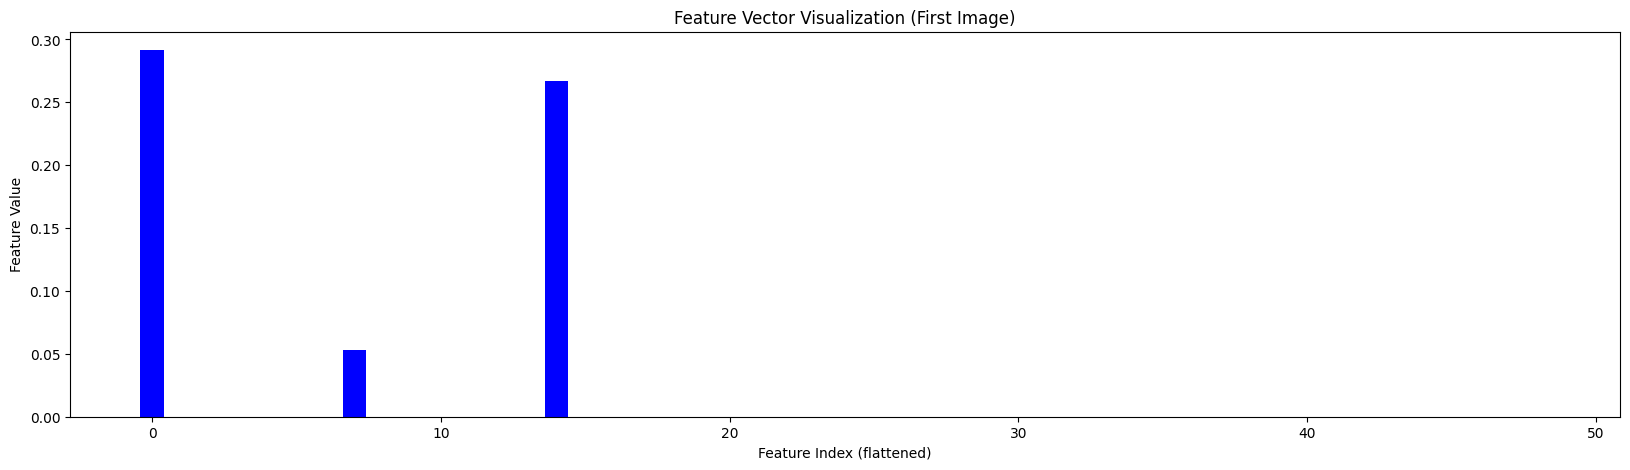

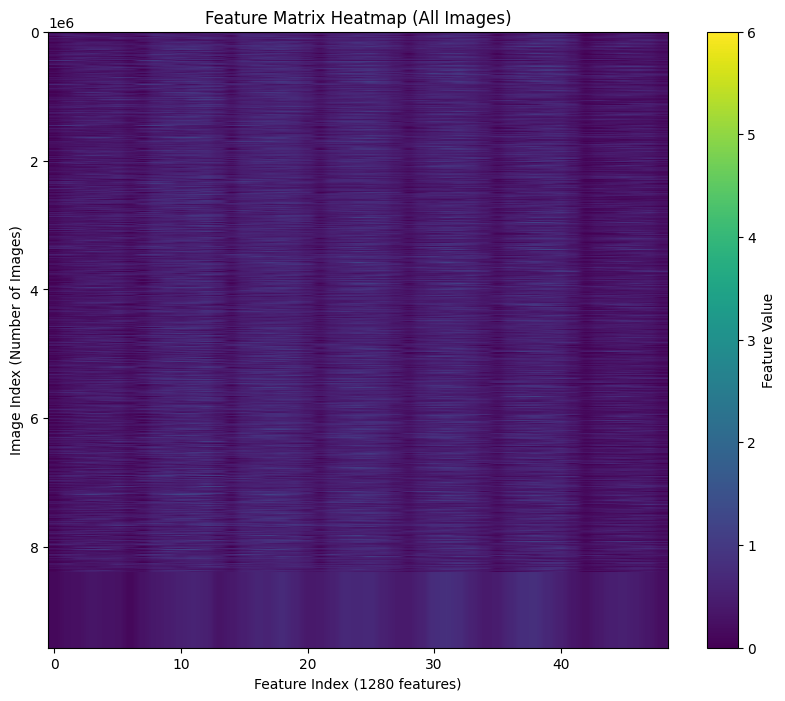

In [ ]:
# # Extract intermediate feature maps
# intermediate_layer = mobilenet.features[5]  # Example layer
# intermediate_model = torch.nn.Sequential(*list(mobilenet.features[:6]))
# with torch.no_grad():
#     intermediate_features = intermediate_model(input_tensor)

# # Visualize feature maps
# import matplotlib.pyplot as plt

# feature_map = intermediate_features.squeeze(0).cpu().numpy()  # Remove batch dimension
# num_features = feature_map.shape[0]  # Number of channels
# plt.figure(figsize=(20, 10))

# for i in range(min(num_features, 16)):  # Visualize first 16 feature maps
#     plt.subplot(4, 4, i + 1)
#     plt.imshow(feature_map[i], cmap="gray")
#     plt.axis("off")

# plt.show()

In [ ]:
# import torch
# import torchvision.models as models
# from torchvision import transforms
# from PIL import Image
# import os
# import matplotlib.pyplot as plt
# from torch.utils.data import DataLoader, Dataset
# import numpy as np

# # Step 1: Load the pre-trained MobileNetV2 model
# mobilenet_v2 = models.mobilenet_v2(pretrained=True)
# mobilenet_v2.eval()  # Set the model to evaluation mode

# # Step 2: Preprocessing pipeline for image (resize, tensor conversion, normalization)
# preprocess = transforms.Compose([
#     transforms.Resize((224, 224)),  # Resize to MobileNetV2 input size
#     transforms.ToTensor(),  # Convert image to tensor
#     transforms.Normalize(   # Normalize with ImageNet statistics
#         mean=[0.485, 0.456, 0.406], 
#         std=[0.229, 0.224, 0.225]
#     )
# ])

# # Step 3: Define a Dataset for loading images in batches
# class ImageDataset(Dataset):
#     def __init__(self, image_directory, transform=None):
#         self.image_directory = image_directory
#         self.transform = transform
#         self.image_files = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png'))]

#     def __len__(self):
#         return len(self.image_files)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.image_directory, self.image_files[idx])
#         image = Image.open(img_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
#         return image, self.image_files[idx]

# # Step 4: Create a DataLoader for batching images
# batch_size = 32  # You can adjust this based on your GPU memory
# dataset = ImageDataset(image_directory, transform=preprocess)
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Step 5: Feature extraction for all images in batches
# features_list = []

# for batch_idx, (inputs, filenames) in enumerate(dataloader):
#     # Move input to the same device as the model (e.g., GPU)
#     inputs = inputs.cuda()  # If using GPU, else remove this line

#     with torch.no_grad():
#         # Extract features from an earlier layer (layer 3 for fewer features)
#         intermediate_model = torch.nn.Sequential(*list(mobilenet_v2.features[:4]))  # Use first 4 layers
#         intermediate_features = intermediate_model(inputs)  # Shape: (batch_size, channels, 7, 7)

#         # Flatten the features to get 1D vector per image
#         flattened_features = intermediate_features.view(intermediate_features.size(0), -1)  # Shape: (batch_size, 1280)
        
#         # Store the flattened features
#         features_list.append(flattened_features.cpu().numpy())

# # Step 6: Combine all extracted features into a matrix
# all_features = np.vstack(features_list)
# print("Feature matrix shape:", all_features.shape)

# # Step 7: Visualize features for the first batch (optional)
# # For the first batch in the DataLoader, visualize the extracted features
# for idx, filename in enumerate(filenames):
#     feature_map = intermediate_features[idx].cpu().numpy()  # Select features for the current image
#     num_features = feature_map.shape[0]  # Number of channels (feature maps)

#     plt.figure(figsize=(20, 10))
#     for i in range(min(num_features, 16)):  # Visualize first 16 feature maps
#         plt.subplot(4, 4, i + 1)
#         plt.imshow(feature_map[i], cmap="gray")
#         plt.axis("off")
#     plt.suptitle(f"Feature Maps for {filename}")
#     plt.show()


RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same